In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
df = pd.read_csv('coffee_shop_revenue.csv')

In [5]:
df = df[df['Daily_Revenue'] >= 0]

In [6]:
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  1999 non-null   int64  
 1   Average_Order_Value          1999 non-null   float64
 2   Operating_Hours_Per_Day      1999 non-null   int64  
 3   Number_of_Employees          1999 non-null   int64  
 4   Marketing_Spend_Per_Day      1999 non-null   float64
 5   Location_Foot_Traffic        1999 non-null   int64  
 6   Daily_Revenue                1999 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 124.9 KB


In [8]:
df.describe()


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,274.400200,6.262526,11.668334,7.949975,252.732396,534.912456,1918.314572
std,129.390393,2.175586,3.438950,3.740788,141.072208,271.728947,975.445026
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,104.600000
25%,164.000000,4.415000,9.000000,5.000000,130.230000,302.000000,1140.755000
50%,275.000000,6.300000,12.000000,8.000000,251.040000,540.000000,1771.630000
75%,386.000000,8.120000,15.000000,11.000000,375.465000,767.000000,2531.350000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


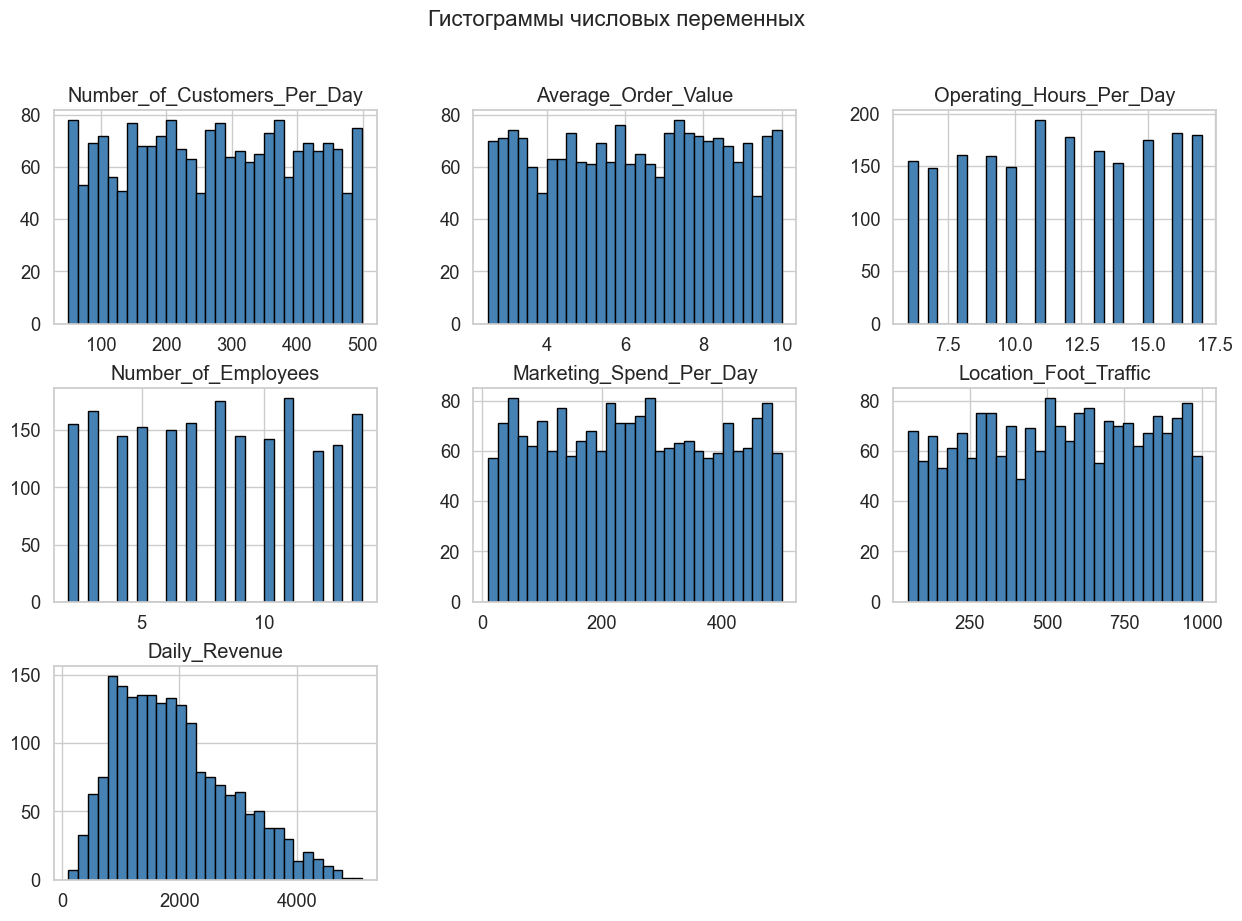

In [9]:
df.hist(bins=30, figsize=(15, 10), color='steelblue', edgecolor='black')
plt.suptitle("Гистограммы числовых переменных", fontsize=16)
plt.show()

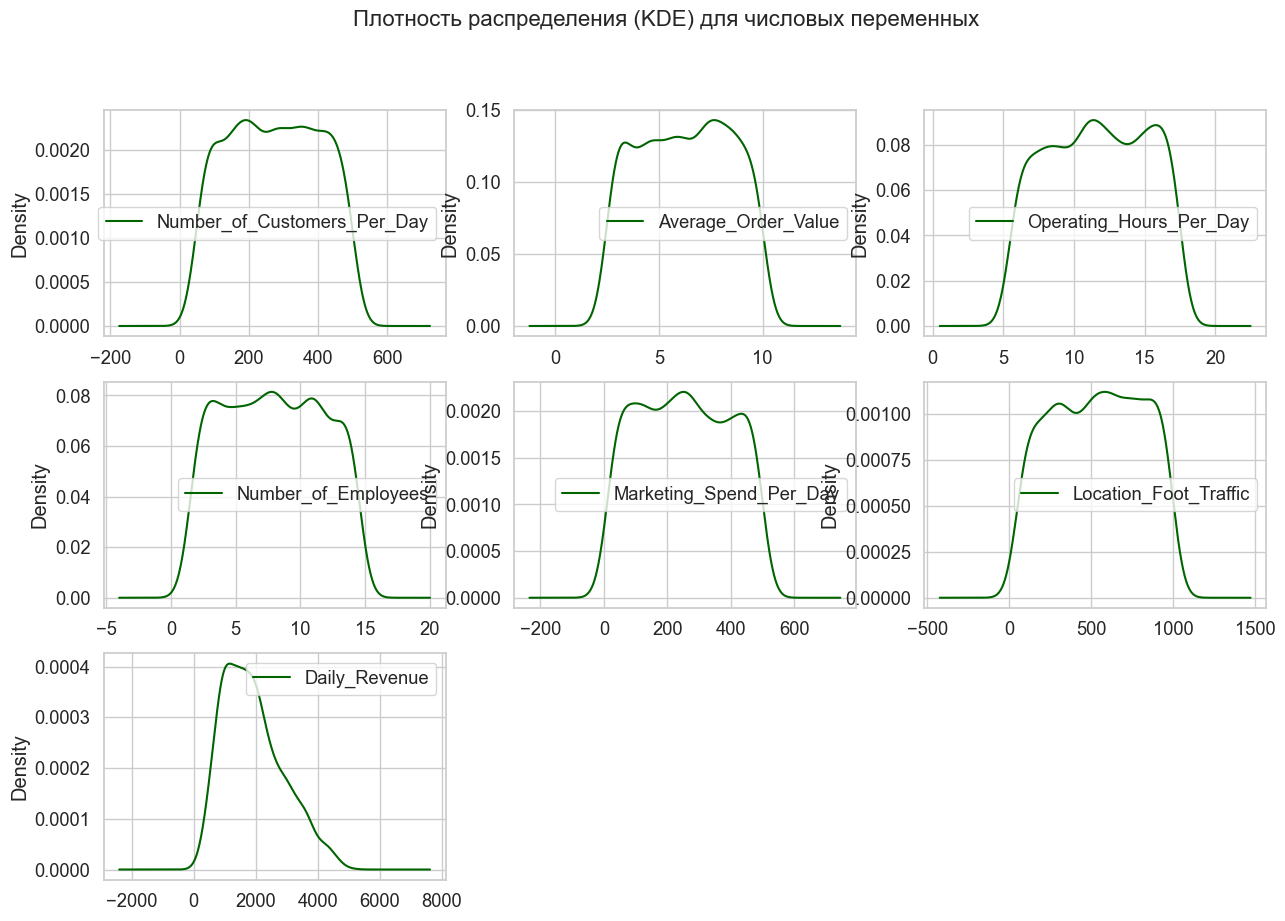

In [10]:
df.plot(kind='density', subplots=True, layout=(int(np.ceil(len(df.select_dtypes(include='number').columns)/3)), 3),
        sharex=False, figsize=(15,10), color='darkgreen')
plt.suptitle("Плотность распределения (KDE) для числовых переменных", fontsize=16)
plt.show()


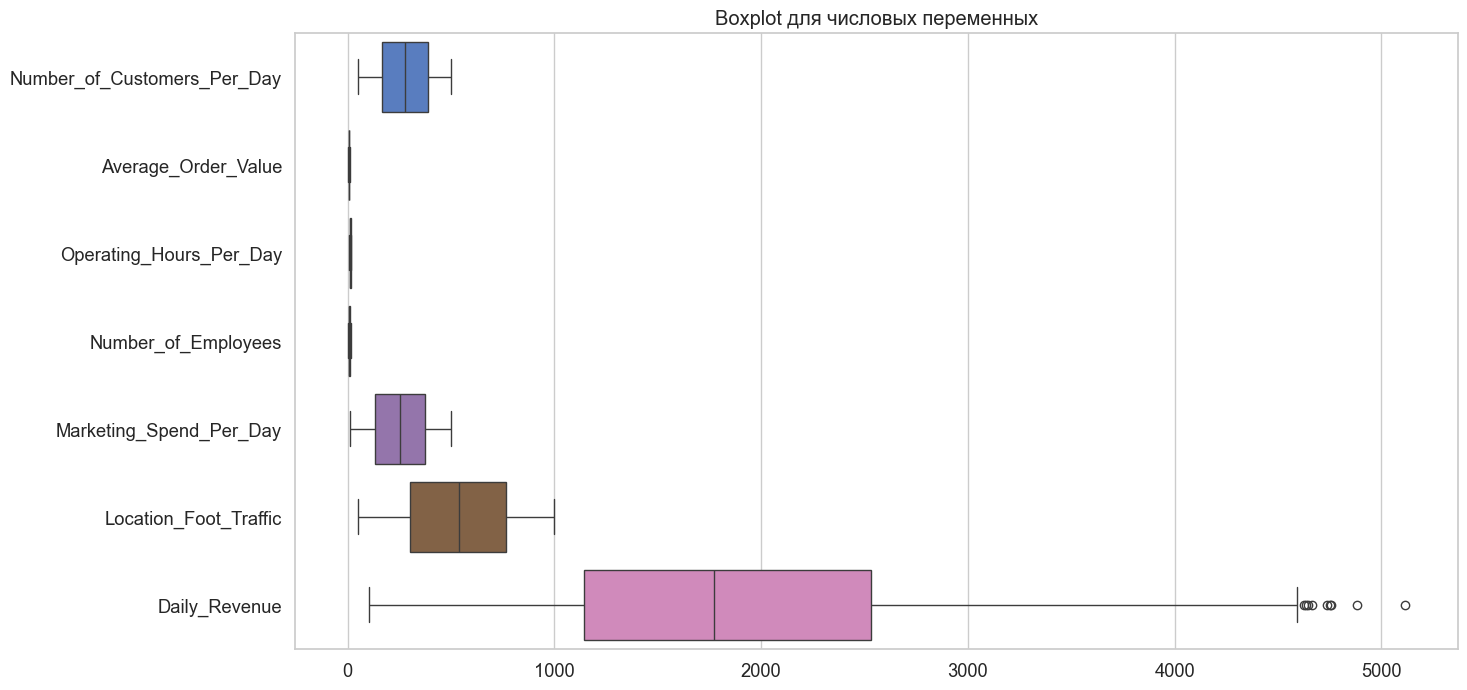

In [11]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient='h')
plt.title("Boxplot для числовых переменных")
plt.show()

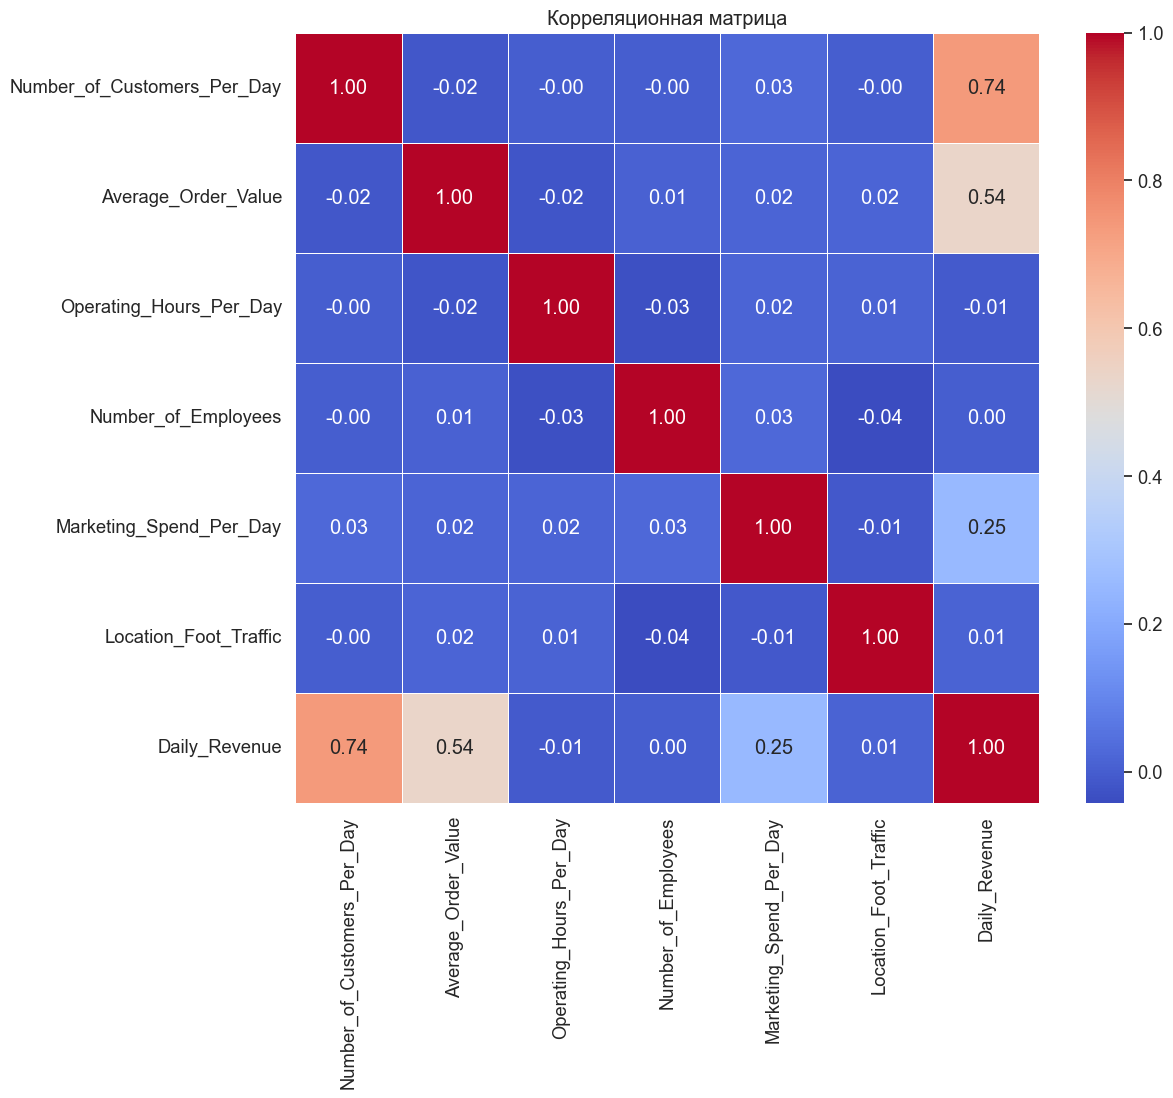

In [12]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

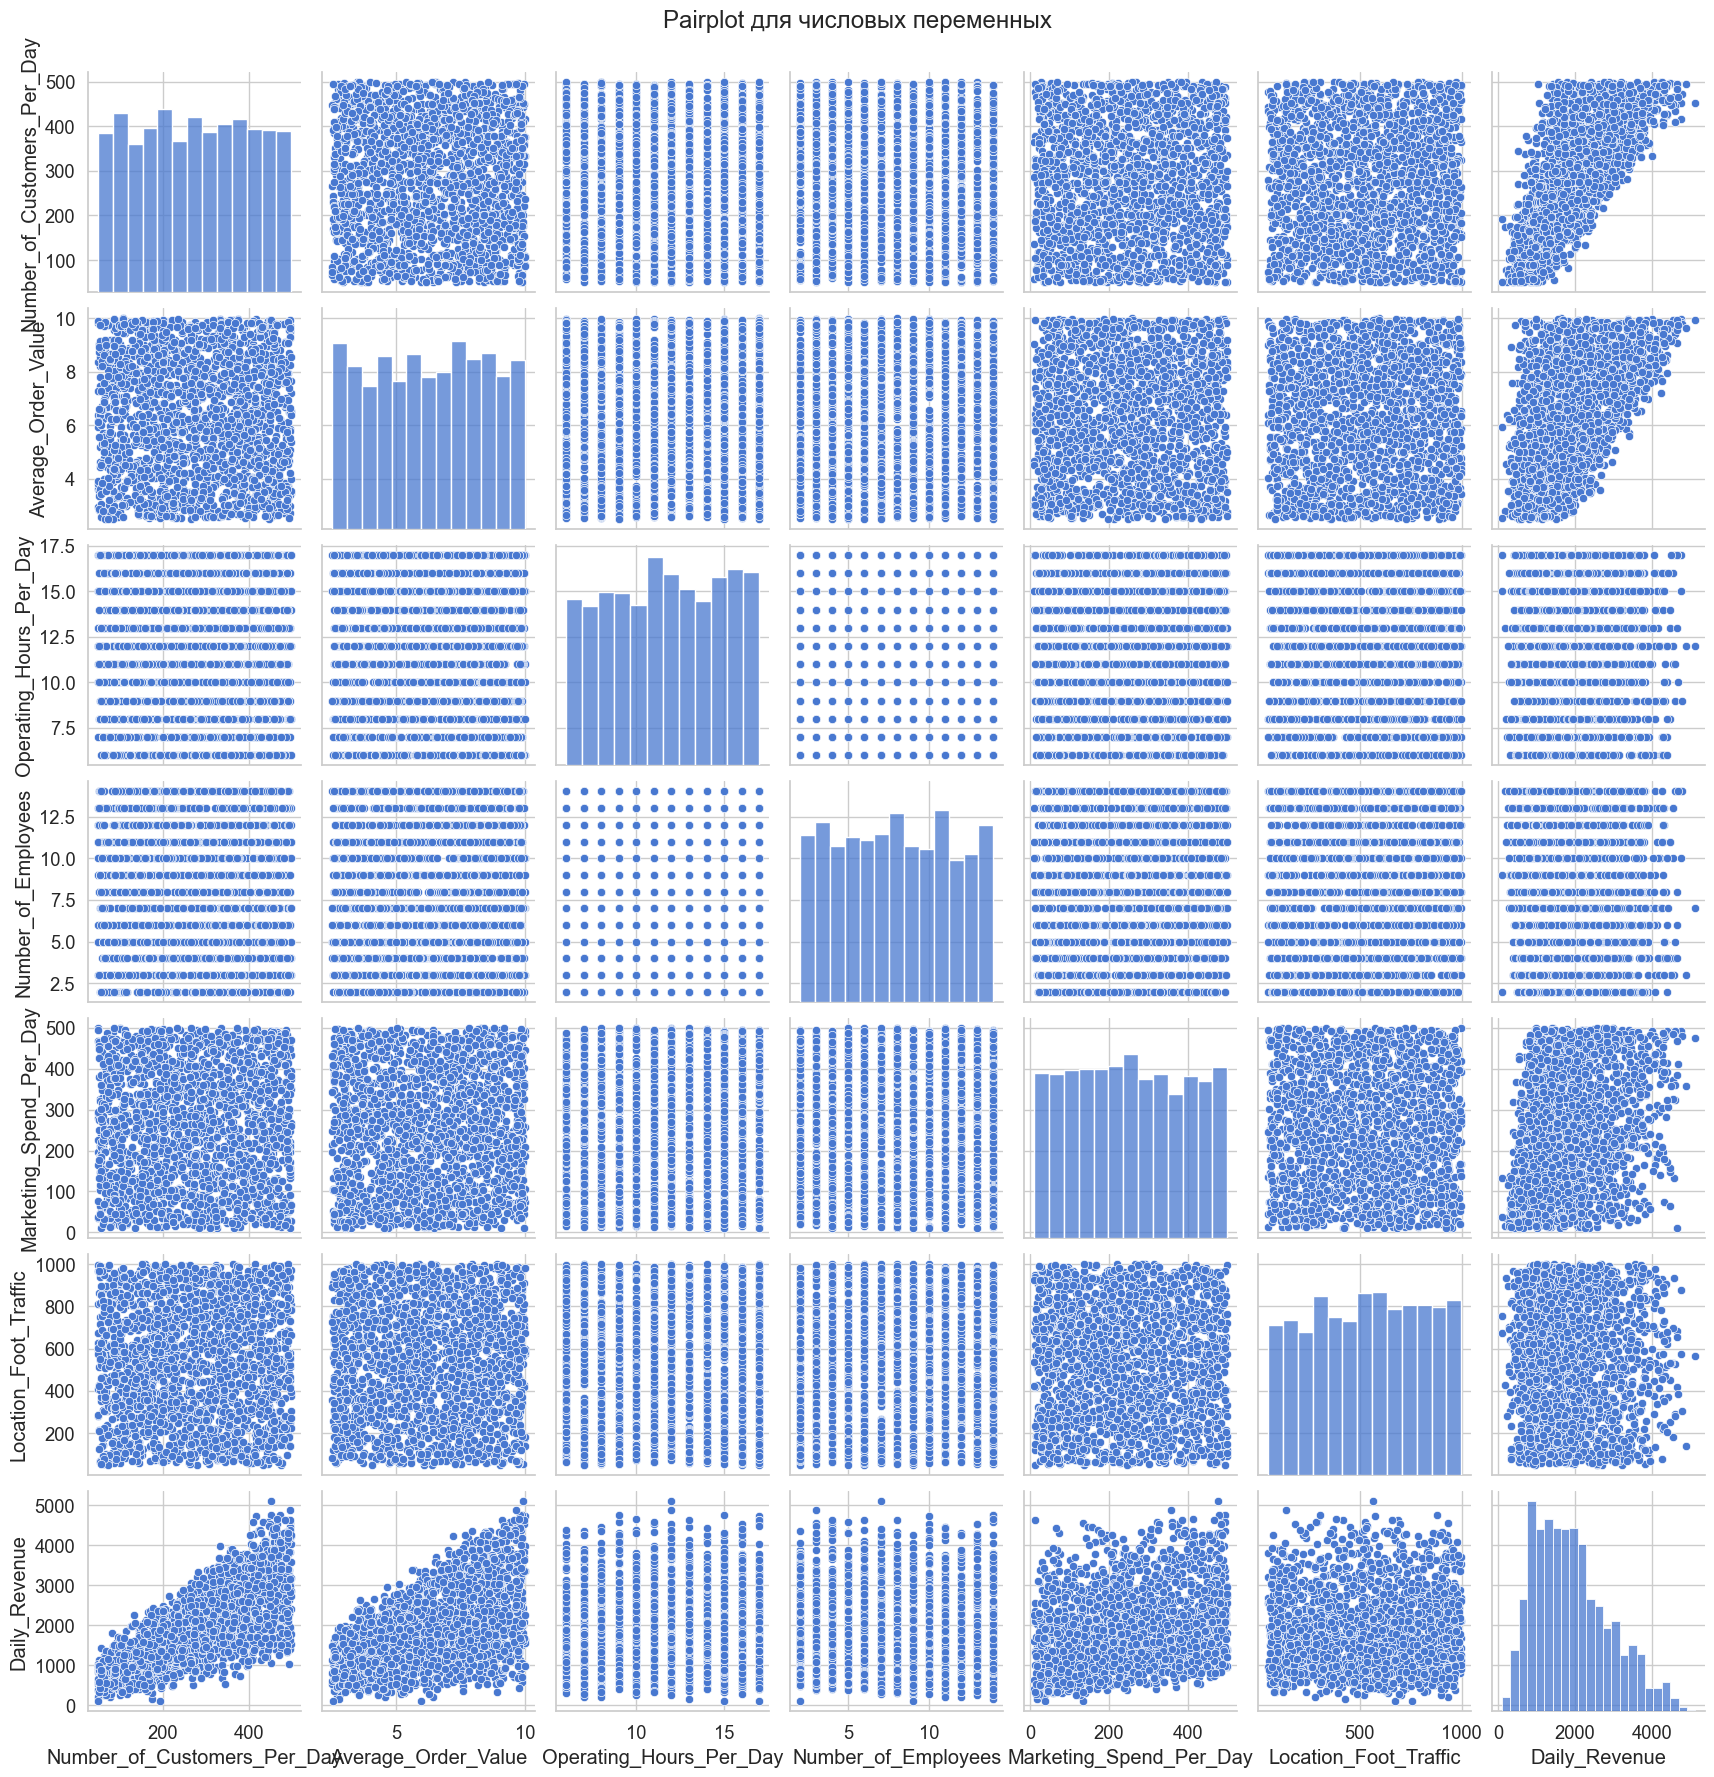

In [13]:
sns.pairplot(df.select_dtypes(include=['number']))
plt.suptitle("Pairplot для числовых переменных", y=1.02)
plt.show()

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Количество выбросов по каждому столбцу:")
print(outliers, "\n")

Количество выбросов по каждому столбцу:
Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  9
dtype: int64 



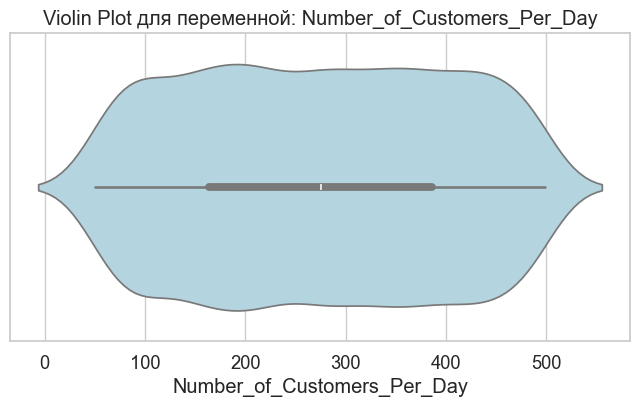

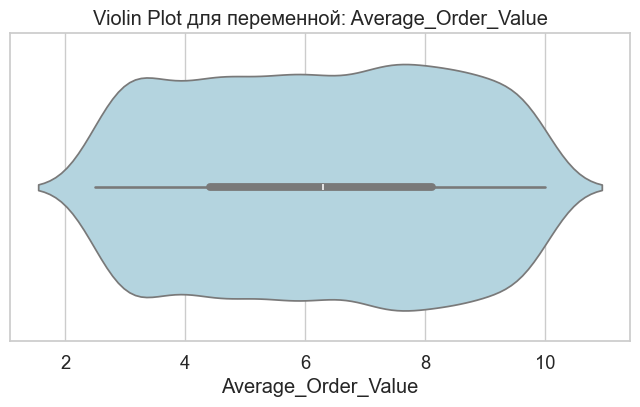

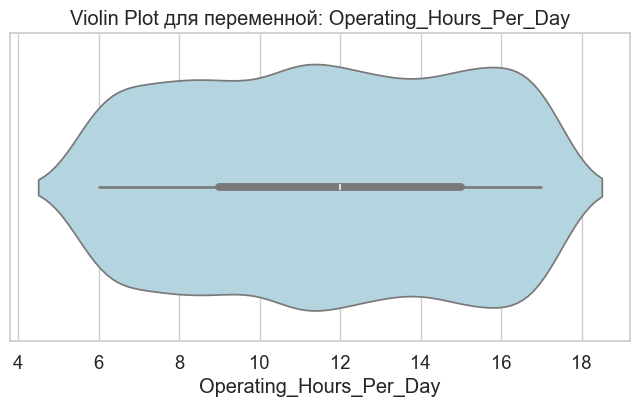

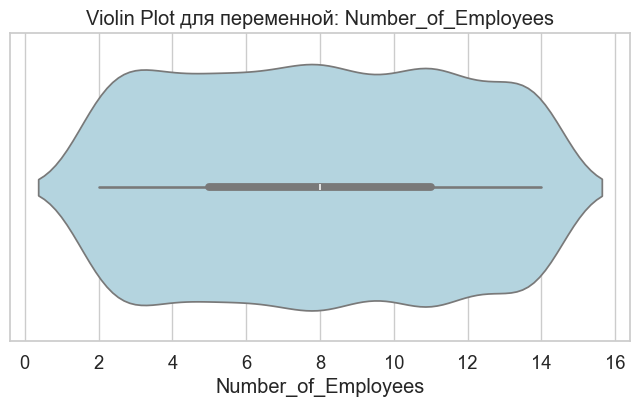

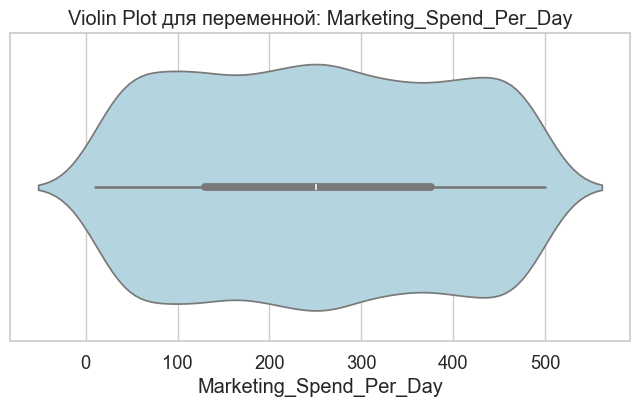

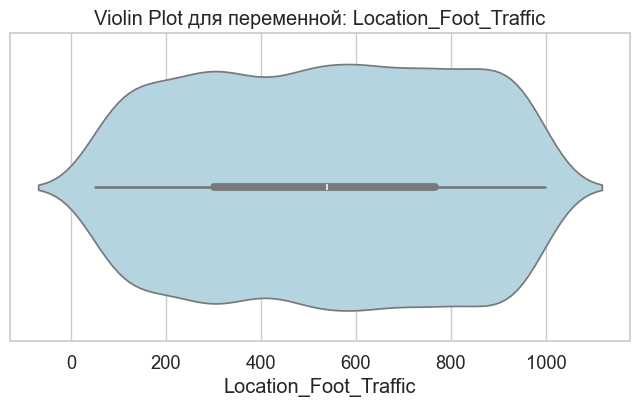

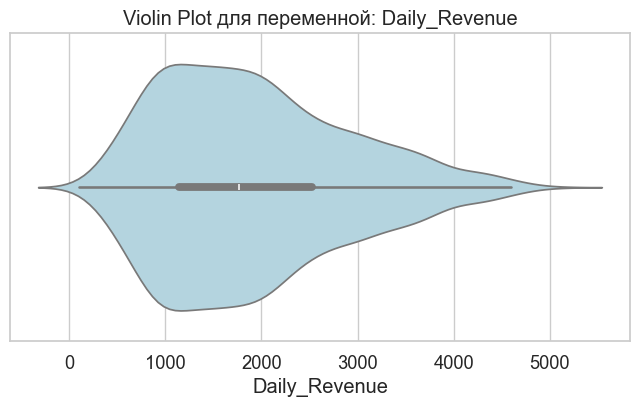

In [15]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.violinplot(data=df, x=col, color='lightblue')
    plt.title(f"Violin Plot для переменной: {col}")
    plt.show()

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
def calculate_vif(df):
    # Отбираем только числовые переменные
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Создаем DataFrame для хранения результатов
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df_numeric.columns
    
    # Рассчитываем VIF для каждого признака
    vif_data['VIF'] = [variance_inflation_factor(df_numeric.values, i) 
                       for i in range(df_numeric.shape[1])]
    
    return vif_data

In [18]:
vif_results = calculate_vif(df)
print("Результаты расчета VIF:")
print(vif_results)

Результаты расчета VIF:
                       Feature        VIF
0  Number_of_Customers_Per_Day  18.148464
1          Average_Order_Value  16.700527
2      Operating_Hours_Per_Day  10.039579
3          Number_of_Employees   5.123549
4      Marketing_Spend_Per_Day   4.540030
5        Location_Foot_Traffic   4.535814
6                Daily_Revenue  27.974843


In [19]:
df['Revenue_per_Employee'] = np.where(df['Number_of_Employees'] != 0,
                                      df['Daily_Revenue'] / df['Number_of_Employees'],
                                      np.nan)

df['Marketing_Efficiency'] = np.where(df['Marketing_Spend_Per_Day'] != 0,
                                      df['Daily_Revenue'] / df['Marketing_Spend_Per_Day'],
                                      np.nan)

df['Foot_Traffic_Conversion'] = np.where(df['Location_Foot_Traffic'] != 0,
                                         df['Number_of_Customers_Per_Day'] / df['Location_Foot_Traffic'],
                                         np.nan)

df['Revenue_per_Operating_Hour'] = np.where(df['Operating_Hours_Per_Day'] != 0,
                                            df['Daily_Revenue'] / df['Operating_Hours_Per_Day'],
                                            np.nan)


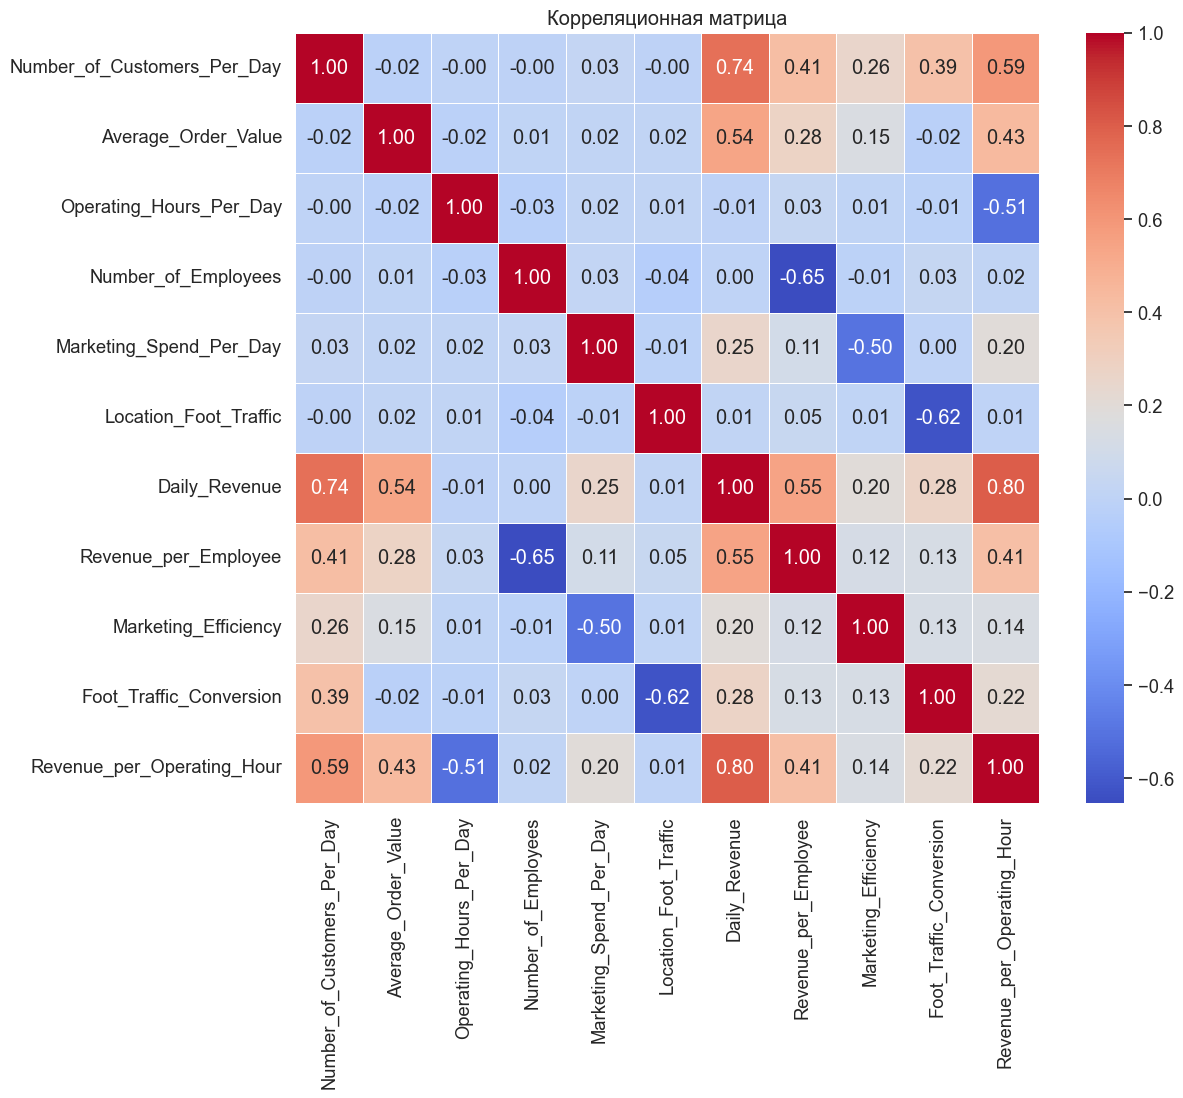

In [20]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

In [21]:
vif_results = calculate_vif(df)
print("Результаты расчета VIF:")
print(vif_results)

Результаты расчета VIF:
                        Feature        VIF
0   Number_of_Customers_Per_Day  27.789276
1           Average_Order_Value  24.029491
2       Operating_Hours_Per_Day  26.391297
3           Number_of_Employees  12.460613
4       Marketing_Spend_Per_Day   7.126416
5         Location_Foot_Traffic   8.468985
6                 Daily_Revenue  34.920339
7          Revenue_per_Employee   7.504249
8          Marketing_Efficiency   2.217261
9       Foot_Traffic_Conversion   3.564021
10   Revenue_per_Operating_Hour  24.551720


In [22]:
df.corr()["Daily_Revenue"].sort_values(ascending=False)

Daily_Revenue                  1.000000
Revenue_per_Operating_Hour     0.802470
Number_of_Customers_Per_Day    0.736062
Revenue_per_Employee           0.545784
Average_Order_Value            0.535217
Foot_Traffic_Conversion        0.276922
Marketing_Spend_Per_Day        0.253554
Marketing_Efficiency           0.197830
Location_Foot_Traffic          0.013341
Number_of_Employees            0.001687
Operating_Hours_Per_Day       -0.006116
Name: Daily_Revenue, dtype: float64